In [96]:
######################################################################################################################
############################################ Autoencoder with MNIST ##################################################
######################################################################################################################

In [112]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,accuracy_score

In [6]:
(x_train,_) , (x_test,_) = mnist.load_data()

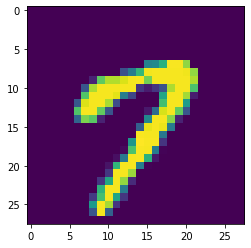

In [36]:
plt.imshow(x_train[15].reshape(28,28))

In [22]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [49]:
print(x_train.shape);

#x_train[a][b][c][d]
#a = number of images
#b,c = width and height of the image
#d = number of channels (RGB) in the image set

(60000, 28, 28, 1)


In [89]:
################################################# Adding Noise #######################################################
noise_factor = .5
x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)
## loc = mean ; scale = Standard Deviation

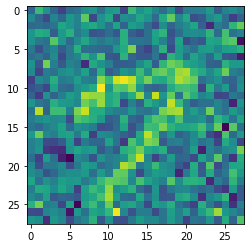

In [46]:
### Noisy data
plt.imshow(x_train_noisy[15].reshape(28,28))

In [104]:
############################################### CNN Architecture #####################################################

input_img = Input(shape=(x_train_noisy[0].shape))

x = Conv2D(16,(3,3), activation = 'relu', padding = 'same')(input_img)
x = MaxPooling2D((2,2),padding='same')(x)
x = Conv2D(8,(3,3),activation = 'relu',padding = 'same')(x)
x = MaxPooling2D((2,2),padding = 'same')(x)
x = Conv2D(8,(3,3),activation = 'relu',padding = 'same')(x)

encoder = MaxPooling2D((2,2),padding = 'same')(x)

x = Conv2D(8,(3,3),activation='relu',padding='same')(encoder)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3), activation = 'relu',padding = 'same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16,(3,3),activation='relu')(x)
x = UpSampling2D((2,2))(x)

decoder = Conv2D(1,(3,3),activation='sigmoid', padding = 'same')(x)

autoencoder = Model(input_img,decoder,name='My_First_Autoencoder')
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [105]:
autoencoder.summary()

Model: "My_First_Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 4, 4, 8)  

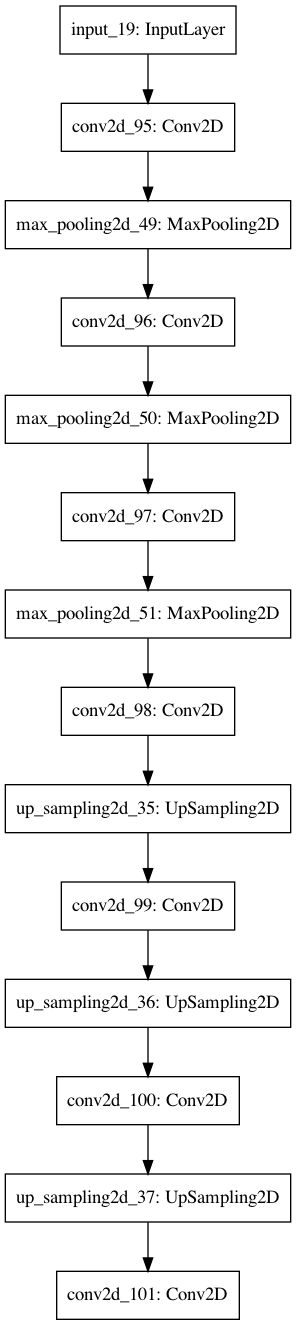

In [119]:
plot_model(autoencoder,
    show_shapes=False,
    show_layer_names=True,
    dpi=96)

In [106]:
autoencoder.fit(x_train_noisy,x_train,epochs=10,batch_size=128,shuffle=True,
               validation_data=(x_train_noisy,x_train))

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.2263 - accuracy: 0.7952 - val_loss: 0.1785 - val_accuracy: 0.7949
Epoch 2/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1674 - accuracy: 0.7999 - val_loss: 0.1585 - val_accuracy: 0.8017
Epoch 3/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.1534 - accuracy: 0.8032 - val_loss: 0.1484 - val_accuracy: 0.8038
Epoch 4/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.1459 - accuracy: 0.8049 - val_loss: 0.1435 - val_accuracy: 0.8068
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.1414 - accuracy: 0.8059 - val_loss: 0.1397 - val_accuracy: 0.8052
Epoch 6/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.1385 - accuracy: 0.8065 - val_loss: 0.1370 - val_accuracy: 0.8076
Epoch 7/10
60000/60000 [==============================] - 106s 

In [107]:
decoded_imgs = autoencoder.predict(x_test_noisy)

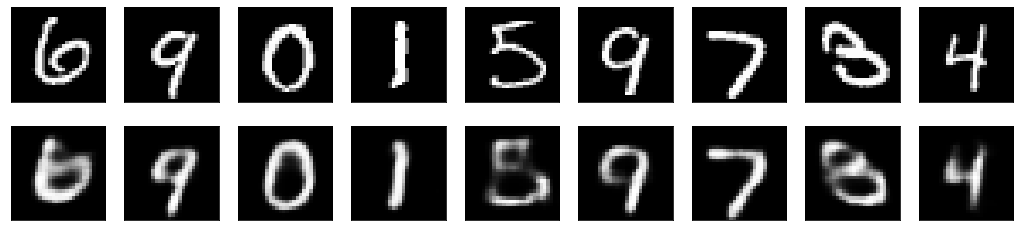

In [122]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i+10].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display Autoencoder Predictions
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i+10].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [109]:
_, test_acc= autoencoder.evaluate(x_test_noisy, x_test, batch_size=32,verbose=1)

10000/10000 [==============================] - 4s 378us/step


In [110]:
test_acc

0.8073266744613647